In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [3]:
# We now compute the correlation between x1 and x2
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation:.4f}")

Correlation between x1 and x2: 0.7723


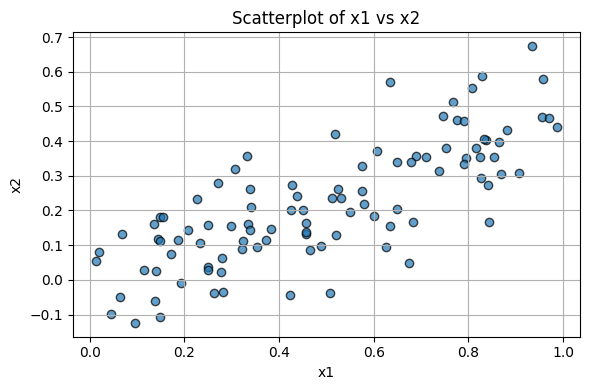

In [4]:
# Now, we make the scatterplot of x1 vs x2
plt.figure(figsize=(6, 4))
plt.scatter(x1, x2, alpha=0.7, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 vs x2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import statsmodels.api as sm
# We now stack x1 and x2 into a design matrix with constant
X = np.column_stack((x1, x2))
X = sm.add_constant(X)  # adds intercept term

# Fit OLS model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           5.76e-08
Time:                        19:25:24   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

In [6]:
# We now fit our model using only x1
# Only x1
X_simple = sm.add_constant(x1)
model_simple = sm.OLS(y, X_simple).fit()

print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           1.37e-08
Time:                        19:25:24   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

In [7]:
# Fit model using only x2
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2).fit()

print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           7.43e-07
Time:                        19:25:24   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

In [8]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y  = np.concatenate([y,  [6]])
